Tìm **top 10 từ khóa** xuất hiện nhiều nhất trong `order_cancel_comment`.  

In [17]:
# install wordcloud
!pip install wordcloud


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\VIETHQ\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
import numpy as np 
import pandas as pd 
from PIL import Image 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re
%matplotlib inline  

In [19]:
try:
    df = pd.read_csv('../../order_cancel_comment.csv')
    print("Dataset loaded successfully")
    print(df.head())
except FileNotFoundError:
    print("File not found. Please check the file path.")

Dataset loaded successfully
                                       order_comment
0  Cancel by admin for user (Other - kh muốn đổi tx)
1  Cancel by admin for ahamove (Other - TX ycau h...
2                                       znskskskskks
3                             Người lấy bánh kêu huỷ
4               Tôi muốn thay đổi số giờ thuê tài xế


Top 10 Keywords Statistics:


,Keyword,Frequency
0,đơn hàng,405
1,hủy đơn,355
2,Nhân viên,341
3,hàng Lý,339
4,Tài xế,219
5,Nguyễn Thị,164
6,viên Nguyễn,145
7,Nguoi,122
8,lấy hàng,119
9,xế không,116


C:\Users\VIETHQ\AppData\Local\Temp\ipykernel_16268\1589678021.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_df, x='Frequency', y='Keyword', palette='viridis')


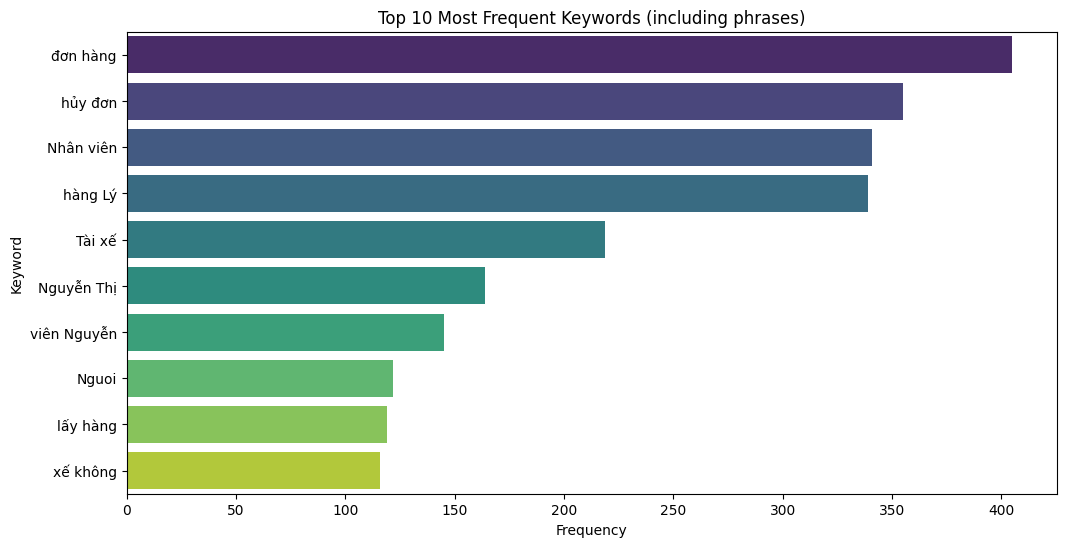

In [22]:
if 'order_comment' in df.columns:
    comment_text = " ".join(comment for comment in df.order_comment.dropna().astype(str))

    stopwords = set(STOPWORDS)

    temp_wc = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=stopwords,
        collocations=True
    )
    
    word_counts = temp_wc.process_text(comment_text)

    top_10 = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10]
    
    top_10_df = pd.DataFrame(top_10, columns=['Keyword', 'Frequency'])
    print("Top 10 Keywords Statistics:")
    display(top_10_df)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_10_df, x='Frequency', y='Keyword', palette='viridis')
    plt.title('Top 10 Most Frequent Keywords (including phrases)')
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.show()
else:
    print("Column 'order_comment' not found in dataframe")

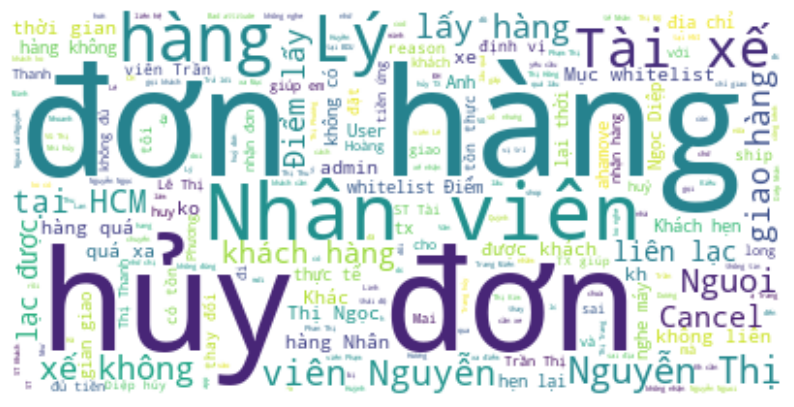

In [21]:
if 'order_comment' in df.columns:
    # Initialize WordCloud
    wordcloud = WordCloud(
        background_color='white',
        max_words=2000,
        stopwords=stopwords,
        collocations=True
    )

    # Generate the word cloud using the same text
    wordcloud.generate(comment_text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()